In [504]:
from get_prediction_data import *
from get_prediction_data_nearshore import *
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

plt.style.use('ggplot')

%matplotlib inline

In [284]:
def unpickle_model(pickle_model_name):
    with open(pickle_model_name, 'rb') as f:
        model = pickle.load(f)
    return model

In [285]:
# unpickling the model
pickle_model_name = 'gbr_2.pkl'
model = unpickle_model(pickle_model_name)

In [286]:
# getting the real time data from offshore buoy

In [310]:
buoyID = 46059
get_prediction_data(buoyID)
prediction_df = clean_prediction_data('../data/data_for_prediction_{}.csv'.format(buoyID))
prediction_df = adding_speed_col(prediction_df, 650)
prediction_df = add_time_delta(prediction_df)
prediction_df = add_time_y(prediction_df)
prediction_df = round_time_y(prediction_df)
prediction_df.to_csv('../data/prediction_df.csv')

prediction_df['ID'] = 46059

cols_to_keep = ['YY', 'MM', 'DD', 'hh', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD',
                'APD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'ID', 't_arrive']

X_real_time_predictions = prediction_df[cols_to_keep].values

In [311]:
prediction_df.head(2)

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,...,VIS,PTDY,TIDE,Date,TempDate,t_arrive,time_delta,time_y,time_y_hr,ID
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-01 12:00:00,2018,2,1,12,50,300.0,1.0,2.0,1.2,10.0,...,NaN,0.4,NaN,2018-02-01 20:00:00,2018-02-01 12:00:00-08:00,14.826106,14:49:33.983241,2018-02-02 02:49:33.983241,2018-02-02 02:00:00,46059
2018-02-01 12:00:00,2018,2,1,12,40,290.0,2.0,3.0,1.2,10.0,...,NaN,0.4,NaN,2018-02-01 20:00:00,2018-02-01 12:00:00-08:00,14.826106,14:49:33.983241,2018-02-02 02:49:33.983241,2018-02-02 02:00:00,46059


In [312]:
# real time predictions at nearshore from the offshore conditions at offshore buoy 46059 
y_hat_realtime = model.predict(X_real_time_predictions)

In [313]:
# adding the model predicted data to the dataframe
prediction_df['y_hat'] = y_hat_realtime

In [316]:
prediction_df.index = prediction_df['time_y_hr']

In [317]:
yy_resample = prediction_df.resample('H').mean()

In [318]:
yy_resample.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,...,PRES,ATMP,WTMP,DEWP,VIS,PTDY,TIDE,t_arrive,ID,y_hat
time_y_hr,,,,,,,,,,,,,,,,,,,,,
2017-12-18 12:00:00,2017.0,12.0,17.0,16.000000,25.000000,356.666667,7.833333,10.166667,1.700000,9.000000,...,1024.866667,13.816667,15.100000,10.450000,NaN,-0.166667,NaN,20.650648,46059.0,1.246343
2017-12-18 13:00:00,2017.0,12.0,17.0,17.000000,5.000000,350.000000,7.500000,10.000000,1.640000,8.500000,...,1025.050000,13.750000,15.100000,10.250000,NaN,0.350000,NaN,20.874574,46059.0,1.199590
2017-12-18 14:00:00,2017.0,12.0,17.0,17.800000,37.000000,286.000000,6.700000,8.600000,1.593667,7.883333,...,1025.530000,13.860000,15.130000,10.450000,NaN,0.700000,NaN,20.737001,46059.0,1.305789
2017-12-18 15:00:00,2017.0,12.0,17.0,19.333333,18.333333,269.166667,5.833333,7.666667,1.611111,7.930556,...,1025.891667,13.866667,15.116667,10.358333,NaN,0.783333,NaN,19.980444,46059.0,1.326567
2017-12-18 16:00:00,2017.0,12.0,17.0,21.400000,29.000000,350.000000,4.300000,5.900000,1.600000,9.700000,...,1026.130000,13.760000,15.100000,10.080000,NaN,0.481667,NaN,19.061736,46059.0,1.206683


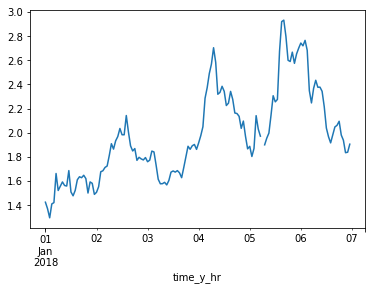

In [319]:
yy_resample['20180101':'20180106']['y_hat'].plot()

In [293]:
# get real time data from the nearshore buoy
buoyID = 46026
get_prediction_data(buoyID)
realtime_df_neashore = clean_prediction_data('../data/data_for_prediction_{}.csv'.format(buoyID))
print('Getting Prediction Data from {}'.format(buoyID))

Getting Prediction Data from 46026


In [303]:
yy_near = realtime_df_neashore.sort_index()

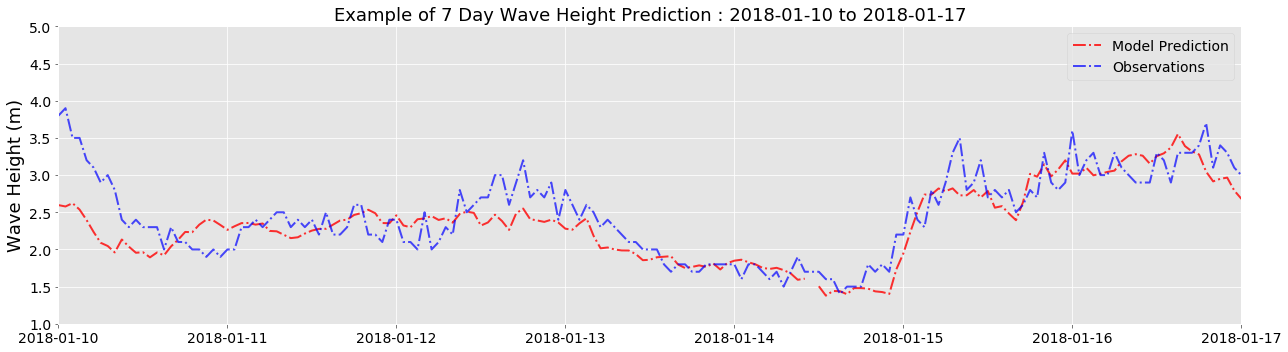

In [690]:
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(yy_resample['20180110':'20180117']['y_hat'],'-.', linewidth=2,
        color='r',label='Model Prediction', alpha=0.8)
ax.plot(yy_near['20180110':'20180117']['WVHT'],'-.',linewidth=2,
        color='b', label='Observations', alpha=0.7)
#_= ax.set_xlabel('Date', fontsize=14)
_= ax.set_ylabel('Wave Height (m)', fontsize=18, color='black')
_= plt.legend(prop={'size': 14})
_= ax.tick_params(axis='x', labelsize=14, labelcolor='black')
_= ax.tick_params(axis='y', labelsize=14, labelcolor='black')
_= ax.set_title('Example of 7 Day Wave Height Prediction : 2018-01-10 to 2018-01-17', fontsize=18)
_= ax.set_xlim('20180110','20180117')
_= ax.set_ylim(1,5)
plt.yticks(np.arange(1, 5.5, 0.5))
plt.tight_layout()
plt.savefig('7dayPredictionEx1.png')

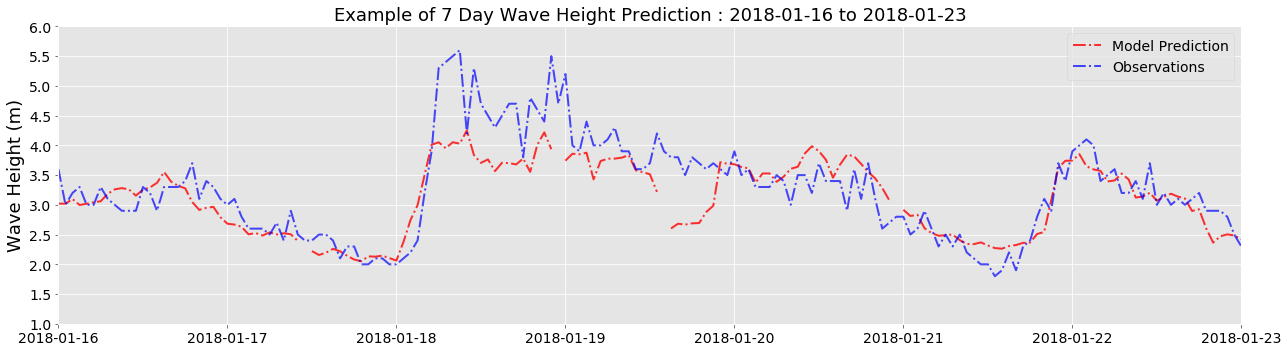

In [689]:
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(yy_resample['20180116':'20180123']['y_hat'],'-.',linewidth=2, 
        color='r',label='Model Prediction', alpha=0.8)
ax.plot(yy_near['20180116':'20180123']['WVHT'],'-.',linewidth=2,
        color='b', label='Observations', alpha=0.7)
#_= ax.set_xlabel('Date', fontsize=14)
_= ax.set_ylabel('Wave Height (m)', fontsize=18, color='black')
_= plt.legend(prop={'size': 14})
_= ax.tick_params(axis='x', labelsize=14, labelcolor='black')
_= ax.tick_params(axis='y', labelsize=14, labelcolor='black')
_= ax.set_title('Example of 7 Day Wave Height Prediction : 2018-01-16 to 2018-01-23', fontsize=18)
_= ax.set_xlim('20180116','20180123')
_= ax.set_ylim(1,6)
plt.yticks(np.arange(1, 6.5, 0.5))
plt.tight_layout()
plt.savefig('7dayPredictionEx2.png')

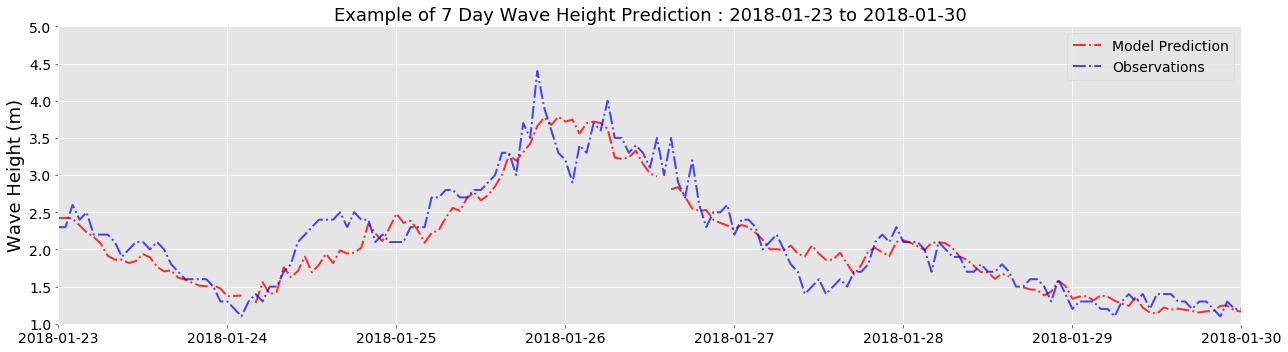

In [688]:
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(yy_resample['20180123':'20180130']['y_hat'],'-.', linewidth=2, 
        color='r',label='Model Prediction', alpha=0.8)
ax.plot(yy_near['20180123':'20180130']['WVHT'],'-.',
        color='b', label='Observations', alpha=0.7, linewidth=2)
#_= ax.set_xlabel('Date', fontsize=14)
_= ax.set_ylabel('Wave Height (m)', fontsize=18, color='black')
_= plt.legend(prop={'size': 14})
_= ax.tick_params(axis='x', labelsize=14, labelcolor='black')
_= ax.tick_params(axis='y', labelsize=14, labelcolor='black')
_= ax.set_title('Example of 7 Day Wave Height Prediction : 2018-01-23 to 2018-01-30', fontsize=18)
_= ax.set_xlim('20180123','20180130')
_= ax.set_ylim(1,5)
plt.yticks(np.arange(1, 5.5, 0.5))
plt.tight_layout()
plt.savefig('7dayPredictionEx3.png')

In [467]:
# adding an hour col to the df to parse it by 6am, 12pm and 6pm
yy_resample['date_fig'] = yy_resample.index
yy_resample['hr_fig'] = yy_resample['date_fig'].apply(lambda x: x.hour)
bar_yy = yy_resample[(yy_resample['hr_fig']==6) | (yy_resample['hr_fig']==12) | (yy_resample['hr_fig']==18)]

In [471]:
# interpolating to fill in the missing gaps 
bar_yy = bar_yy.interpolate(method='linear', axis=0).bfill()

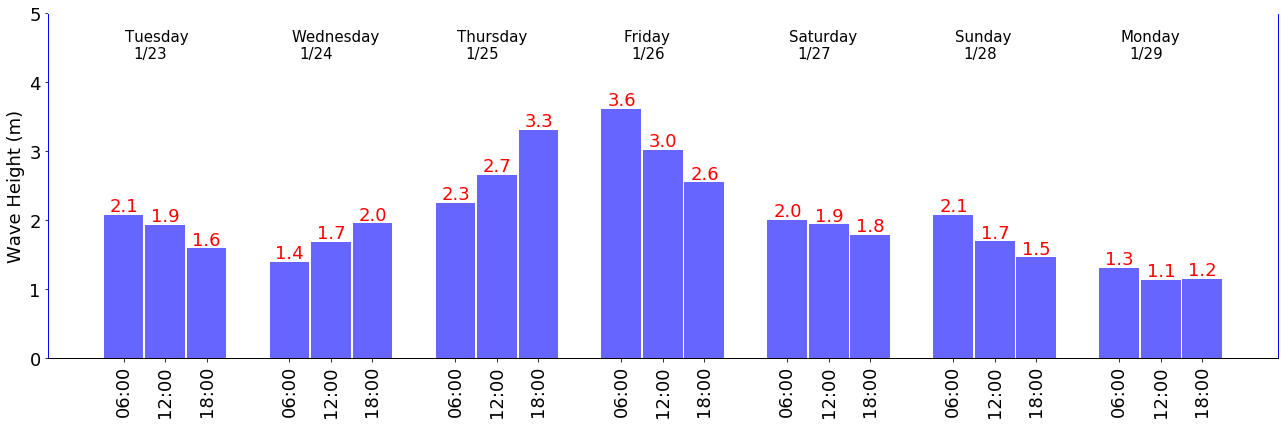

In [701]:
myFmt = mdates.DateFormatter('%H:%S')

fig, ax = plt.subplots(figsize=(18,6))
ax.bar(bar_yy['20180123':'20180129']['y_hat'].index, 
       bar_yy['20180123':'20180129']['y_hat'].values,
       width =0.24,
       align='center', alpha=0.6, color='b')

_= plt.xticks(bar_yy['20180123':'20180129']['y_hat'].index)
_= ax.xaxis.set_major_formatter(myFmt)
_= plt.xticks(rotation=90)
_= ax.set_ylim(0,5)

# set individual bar lables using above list
for j, i in enumerate(ax.patches):
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.035, i.get_height()+.05, \
            str(round(bar_yy['20180123':'20180129']['y_hat'].values[j],1)), fontsize=18,
                color='red')
        
weekday_dict={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
for j, i in enumerate(ax.patches[0::3]):
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.13, 4.6, \
            weekday_dict[bar_yy['20180123':'20180129']['y_hat'][0::3].index[j].weekday()], fontsize=15,
                color='black')
    
for j, i in enumerate(ax.patches[0::3]):
    # get_x pulls left or right; get_height pushes up or down
    month = bar_yy['20180123':'20180129']['y_hat'][0::3].index[j].month
    day = bar_yy['20180123':'20180129']['y_hat'][0::3].index[j].day
    
    ax.text(i.get_x()+0.18, 4.35,
            str(month)+'/'+str(day), 
            fontsize=15,color='black')
    
_= ax.tick_params(axis='x', labelsize=18, color='black')
_= ax.tick_params(axis='y', labelsize=18, color= 'black')
_= ax.set_ylabel('Wave Height (m)', fontsize=18, color='black')
_= ax.tick_params(axis='x', colors='black')
_= ax.tick_params(axis='y', colors='black')
_= ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('blue')
ax.spines['left'].set_color('blue')
plt.tight_layout()
plt.savefig('Example_Dash_Board.png')

In [705]:
now = datetime.datetime.now()


In [731]:
from datetime import date
from datetime import datetime
from datetime import timedelta
dt = date.today()
dt_midnight = datetime.combine(dt, datetime.min.time())
time_start = dt_midnight + timedelta(hours = 24)
time_end = dt_midnight + timedelta(hours = 168)
print(time_start)
print(time_end)

2018-02-03 00:00:00
2018-02-09 00:00:00


datetime.timedelta(1)

In [729]:
8*24

192

In [638]:
bar_yy['20180123':'20180129']['y_hat'].index[0].day

23

In [634]:
weekday_dict={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

<Container object of 12 artists>

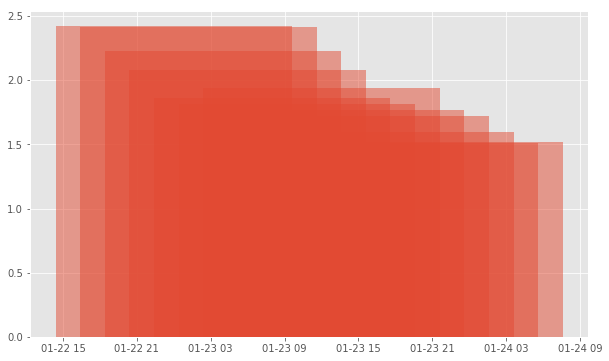

In [435]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(yy_resample['20180123':'20180123']['y_hat'][0::2].index, 
       yy_resample['20180123':'20180123']['y_hat'][0::2],
       align='center', alpha=0.5)

In [449]:
testbar = yy_resample['20180123':'20180125']['y_hat']

<Container object of 72 artists>

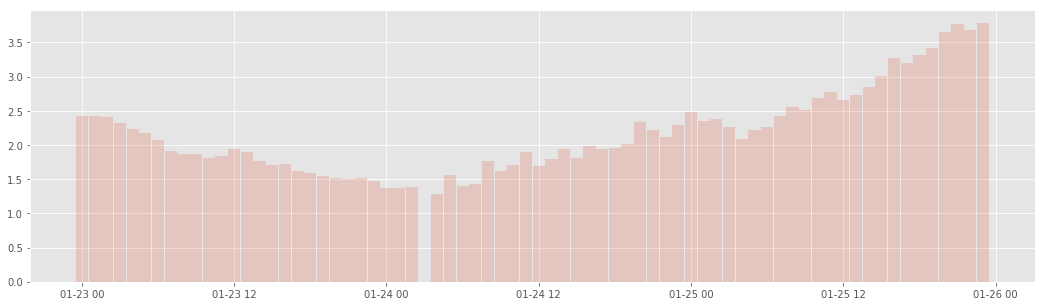

In [450]:
fig, ax = plt.subplots(figsize=(18,5))
plt.bar(testbar.index, testbar, width=0.04, alpha=0.2)

In [445]:
1/24

0.041666666666666664

In [159]:
prediction_df.index = prediction_df['time_y_hr']

In [162]:
test = prediction_df.resample('H').mean()

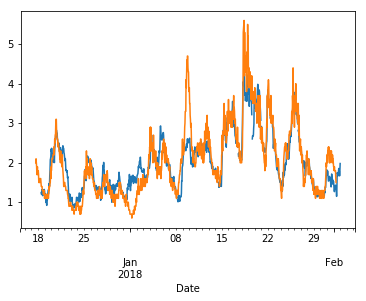

In [164]:
test['y_hat'].plot()
realtime_df_neashore['WVHT'].plot()

In [171]:
650/((9.81*15**2)/(2*3.14))*3.6

6.6576962283384304

In [147]:
# making a prediction dataframe with the correct dates
prediction_df_plt = prediction_df[['time_y_hr','y_hat']] 

In [150]:
prediction_df_plt.tail()

,time_y_hr,y_hat
Date,,
2017-12-17 16:00:00,2017-12-18 12:00:00,1.269563
2017-12-17 16:00:00,2017-12-18 12:00:00,1.251326
2017-12-17 16:00:00,2017-12-18 12:00:00,1.242192
2017-12-17 16:00:00,2017-12-18 12:00:00,1.255903
2017-12-17 16:00:00,2017-12-18 12:00:00,1.268730


Getting Prediction Data from 46026


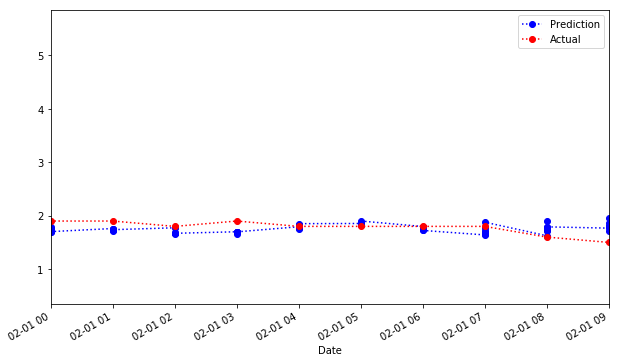

In [135]:
time_start = '2018-01-01 00:00:00'
time_end =  '2018-02-01 00:00:00'

fig, ax = plt.subplots(figsize=(10,6))
prediction_df['y_hat'].plot(ax=ax, label = 'Prediction', marker ='o', color = 'b', linestyle=':')
realtime_df_neashore['WVHT'].plot(ax=ax, label = 'Actual', marker = 'o', color = 'r', linestyle=':')
ax.set_xlim(['2018-02-01 00:00:00','2018-02-01 09:00:00'])
plt.legend()


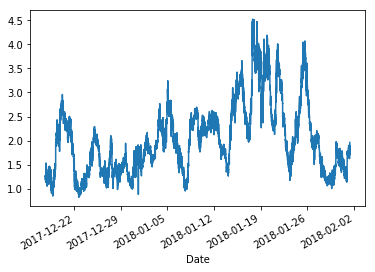

In [137]:
prediction_df['y_hat'].plot()

In [76]:
realtime_df_neashore.index = realtime_df_neashore['Date']

In [77]:
realtime_df_neashore.head(2)

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,...,MWD,PRES,ATMP,WTMP,DEWP,VIS,PTDY,TIDE,Date,TempDate
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-01 16:00:00,2018,2,1,8,50,10.0,2.0,2.0,1.6,11,...,300.0,1019.6,12.3,12.0,NaN,NaN,1.3,NaN,2018-02-01 16:00:00,2018-02-01 08:00:00-08:00
2018-02-01 15:00:00,2018,2,1,7,50,60.0,2.0,2.0,1.8,11,...,300.0,1019.1,12.6,11.9,NaN,NaN,1.2,NaN,2018-02-01 15:00:00,2018-02-01 07:00:00-08:00


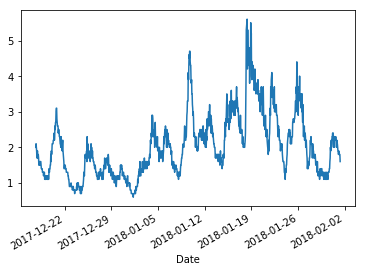

In [48]:
realtime_df_neashore['WVHT'].plot()

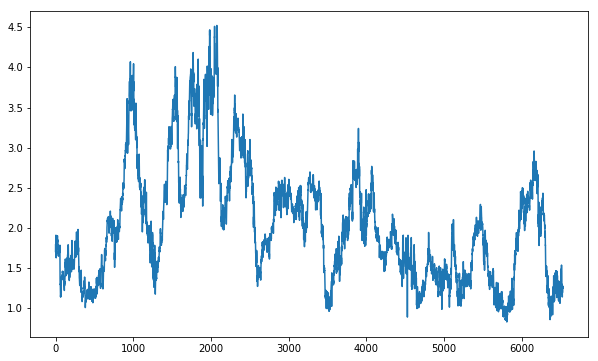

In [38]:
fig, ax = plt.subplots(figsize=(10,6))   
ax.plot(y_hat_realtime)

In [ ]:
model.